# DT Regressor & Feature Importance

## Import Package and Data

In [19]:
import pandas as pd

In [20]:
dat=pd.read_csv("dm.csv")
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [21]:
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


## Divide Data into Dependent (y) and Independent Features (X)

In [22]:
y=dat['AmountSpent']

In [23]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)

In [24]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


## Get Dummies

In [25]:
X=pd.get_dummies(X)

In [26]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


## Split Data into Train and Test

In [27]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

## Declare DT Instance and Build Model

In [28]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(criterion='mse', max_depth=8,random_state=200)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=200)

In [29]:
reg.score(X_test,y_test)

0.7850069438317552

## Feature Importance

In [30]:
reg.feature_importances_

array([5.81462712e-01, 3.05606867e-02, 1.67290446e-01, 3.09871163e-04,
       1.85409983e-03, 5.56823396e-04, 6.94111490e-03, 4.62186137e-04,
       5.36906857e-04, 0.00000000e+00, 2.61445579e-03, 4.46398404e-04,
       2.43145520e-02, 2.61786584e-02, 3.19362232e-02, 5.52022578e-02,
       6.93326074e-02])

In [32]:
#pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False)

In [38]:
feat_imp = pd.DataFrame({ 
    'Feature_Name' : X.columns,
    'Feature_Importance' : reg.feature_importances_
})
feat_imp.sort_values('Feature_Importance', ascending = False)

,Feature_Name,Feature_Importance
0,Salary,0.581463
2,Catalogs,0.167290
16,History_Medium,0.069333
15,History_Low,0.055202
14,History_High,0.031936
1,Children,0.030561
13,Location_Far,0.026179
12,Location_Close,0.024315
6,Gender_Female,0.006941
10,Married_Married,0.002614


<AxesSubplot:ylabel='Feature_Name'>

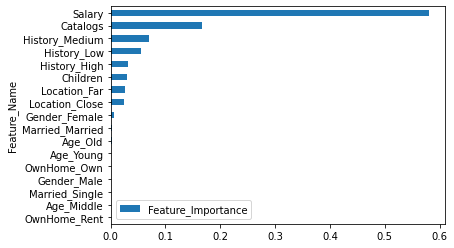

In [41]:
feat_imp.sort_values('Feature_Importance').plot.barh('Feature_Name', 'Feature_Importance')

## Which Parameters are the best?
- https://scikit-learn.org/stable/modules/tree.html#regression
- max_depth, max_features, criterion, min_samples_split

### max_depth

In [47]:
# 3
mod = tree.DecisionTreeRegressor(max_depth=3)
mod.fit(X, y)
mod.score(X, y)

0.6194121147877376

In [48]:
# 4
mod = tree.DecisionTreeRegressor(max_depth=4)
mod.fit(X, y)
mod.score(X, y)

0.698201812753044

In [49]:
# 5
mod = tree.DecisionTreeRegressor(max_depth=5)
mod.fit(X, y)
mod.score(X, y)

0.7602409173181751

In [50]:
# 100
mod = tree.DecisionTreeRegressor(max_depth=100)
mod.fit(X, y)
mod.score(X, y)

0.9996789952112247